In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
Base_Dados = pd.read_csv('StudentsPerformance.csv')
Base_Dados.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
Base_Dados.shape

(1000, 8)

### Verificando os Dados

In [4]:
#Renomeando as colunas
Base_Dados.rename(columns={
    'gender': 'Gênero',
    'race/ethnicity': 'Etinía',
    'parental level of education': 'Nivel Educação Parental',
    'test preparation course': 'Curso preparatório',
    'math score': 'Nota Matemática',
    'reading score': 'Nota Letras',
    'writing score': 'Nota Redação',
    'lunch': 'Bolsa'
}, inplace= True)

Base_Dados

,Gênero,Etinía,Nivel Educação Parental,Bolsa,Curso preparatório,Nota Matemática,Nota Letras,Nota Redação
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
#Verificando Campos Nulos
Base_Dados.isnull().sum()

Gênero                     0
Etinía                     0
Nivel Educação Parental    0
Bolsa                      0
Curso preparatório         0
Nota Matemática            0
Nota Letras                0
Nota Redação               0
dtype: int64

In [6]:
#Verificando Tipo de Dados
Base_Dados.dtypes

Gênero                     object
Etinía                     object
Nivel Educação Parental    object
Bolsa                      object
Curso preparatório         object
Nota Matemática             int64
Nota Letras                 int64
Nota Redação                int64
dtype: object

In [7]:
#Verificando Campos únicos
Base_Dados.nunique()

Gênero                      2
Etinía                      5
Nivel Educação Parental     6
Bolsa                       2
Curso preparatório          2
Nota Matemática            81
Nota Letras                72
Nota Redação               77
dtype: int64

In [8]:
#Campos Duplicados
Base_Dados.duplicated().sum()

0

### Análises

In [9]:
#Estatística
round(Base_Dados.describe(), 1)

,Nota Matemática,Nota Letras,Nota Redação
count,1000.0,1000.0,1000.0
mean,66.1,69.2,68.1
std,15.2,14.6,15.2
min,0.0,17.0,10.0
25%,57.0,59.0,57.8
50%,66.0,70.0,69.0
75%,77.0,79.0,79.0
max,100.0,100.0,100.0


In [10]:
def mediaNotasPor(colunaEscolhida):
    fig, ax = plt.subplots(3, 1, figsize=(10,8))

    Parental_Math = Base_Dados.groupby(by= [colunaEscolhida]).mean('Nota Matemática')['Nota Matemática'].reset_index()
    Parental_Read = Base_Dados.groupby(by= [colunaEscolhida]).mean('Nota Letras')['Nota Letras'].reset_index()
    Parental_Writ = Base_Dados.groupby(by= [colunaEscolhida]).mean('Nota Redação')['Nota Redação'].reset_index()
    #Agrupei a média de cada matéria na coluna escolhida

    FigMathParent = Parental_Math['Nota Matemática'].sort_values(ascending= False)
    FigReadParent = Parental_Read['Nota Letras'].sort_values(ascending= False)
    FigWritParent = Parental_Writ['Nota Redação'].sort_values(ascending= False)

    EixoX = Base_Dados[colunaEscolhida].unique()

    #Definindo Título e ajustando espaço
    fig.suptitle(f'Média de notas por {colunaEscolhida}'); 
    fig.subplots_adjust(hspace=0.5)

    #criando gráficos
    ax[0].plot(EixoX, FigMathParent, color= 'red', marker= 'o', ms= '4', mec= '#000', markerfacecolor= 'w')
    ax[1].plot(EixoX, FigReadParent, color= 'blue', marker= 'o', ms= '4', mec= '#000', markerfacecolor= 'w')
    ax[2].plot(EixoX, FigWritParent, color= 'green', marker= 'o', ms= '4', mec= '#000', markerfacecolor= 'w')

    #Definindo titulo individual
    titulos = ["Matemática", "Letras", "Redação"]
    for i in range(3):
        ax[i].set_title(titulos[i])

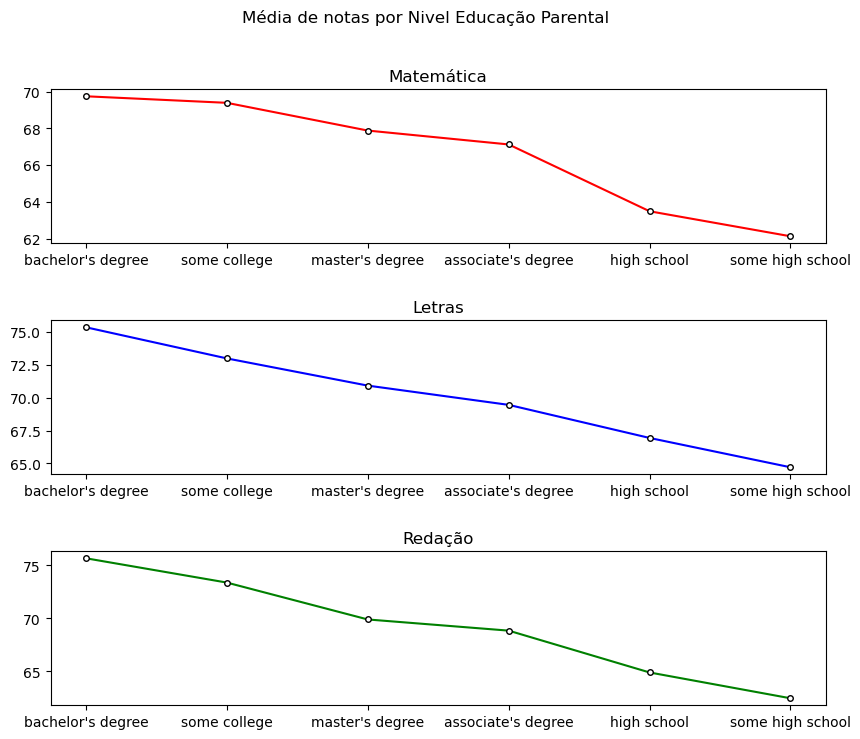

In [11]:
mediaNotasPor('Nivel Educação Parental')

In [12]:
def pizza(coluna):
    pct = round(Base_Dados[coluna].value_counts(normalize= True)*100, 1) #Pegando a porcentagem dos valores
    pct = pct.values.tolist()
    
    label = Base_Dados[coluna].unique().tolist()

    fig, ax = plt.subplots(figsize= (8, 7))
    fig.suptitle(f'Diferença de porcentagem da coluna {coluna}', fontsize= 19)
    
    #Criando o explode, junto com um laço de repetição para que adicione valores a lista de acordo com a quantidade de valores na lista de labels 
    explode = [0.05]
    for _ in range(len(label) - 1):
        explode.append(0)

    #Criando variáveis para personalizar ou ajustar propriedades específicas
    wedges, texts, autotexts = ax.pie(pct, labels= label, autopct= '%1.1f%%', explode= explode)
    
    # Personalizando as propriedades das fatias
    for w in wedges:
        w.set_linewidth(0.5)  # Define a largura da linha da borda da fatia
        w.set_edgecolor('black')  # Define a cor da borda da fatia;

    
    # Personalizando os rótulos
    for label in texts:
        label.set_fontsize(12)  # Define o tamanho da fonte dos rótulos
    

    # Personalizando os textos automáticos (autopct)
    for autotext in autotexts:
        autotext.set_fontsize(10)  # Define o tamanho da fonte dos textos automáticos
        autotext.set_color('white')  # Define a cor dos textos automáticos
        autotext.set_fontweight('semibold') #Definindo o peso da fonte
    

    colors = ['#ac4bbf', '#28b9de']
    if coluna == 'Gênero':
        for w, color in zip(wedges, colors): #o zip()d fez: ('female', '#ac4bbf') ('male', '#28b9de')
            w.set_color(color)


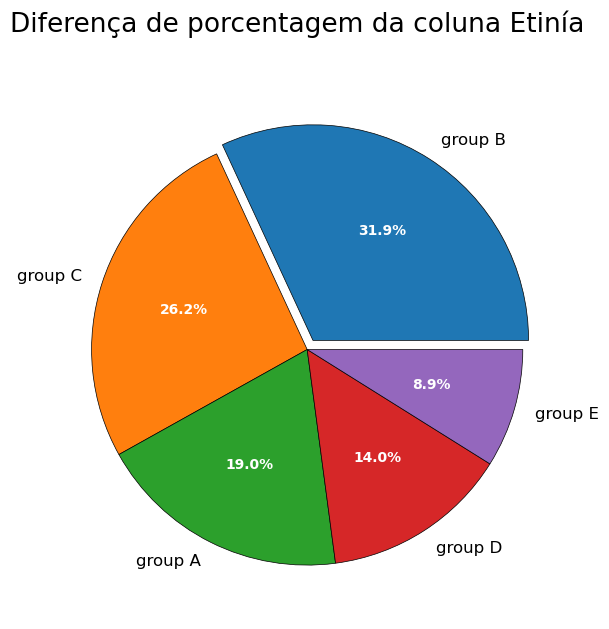

In [13]:
pizza('Etinía')

In [14]:
def boxplot(coluna):   
    fig, ax = plt.subplots(3, 1, figsize=(12, 12), sharey=True) #sharey=True, significa que todos os subplots compartilharão o mesmo eixo y.

    #usando "fig" para visual (como titulo, espaçamento e etc.) e ax para posição de cada gráfico, como se fosse plt.subplot(3, 1, 1) depois plt.subplot(3, 1, 2)...
    fig.suptitle(f'Gráfico de Caixa por {coluna}', fontsize= 17, weight= 'bold')
    fig.subplots_adjust(hspace=0.5)
    
    for i in range(3):
        eixoX = 'Nota Matemática' if i == 0 else ('Nota Letras' if i == 1 else 'Nota Redação')
        sns.boxplot(ax=ax[i], data= Base_Dados, x= eixoX, y= coluna)

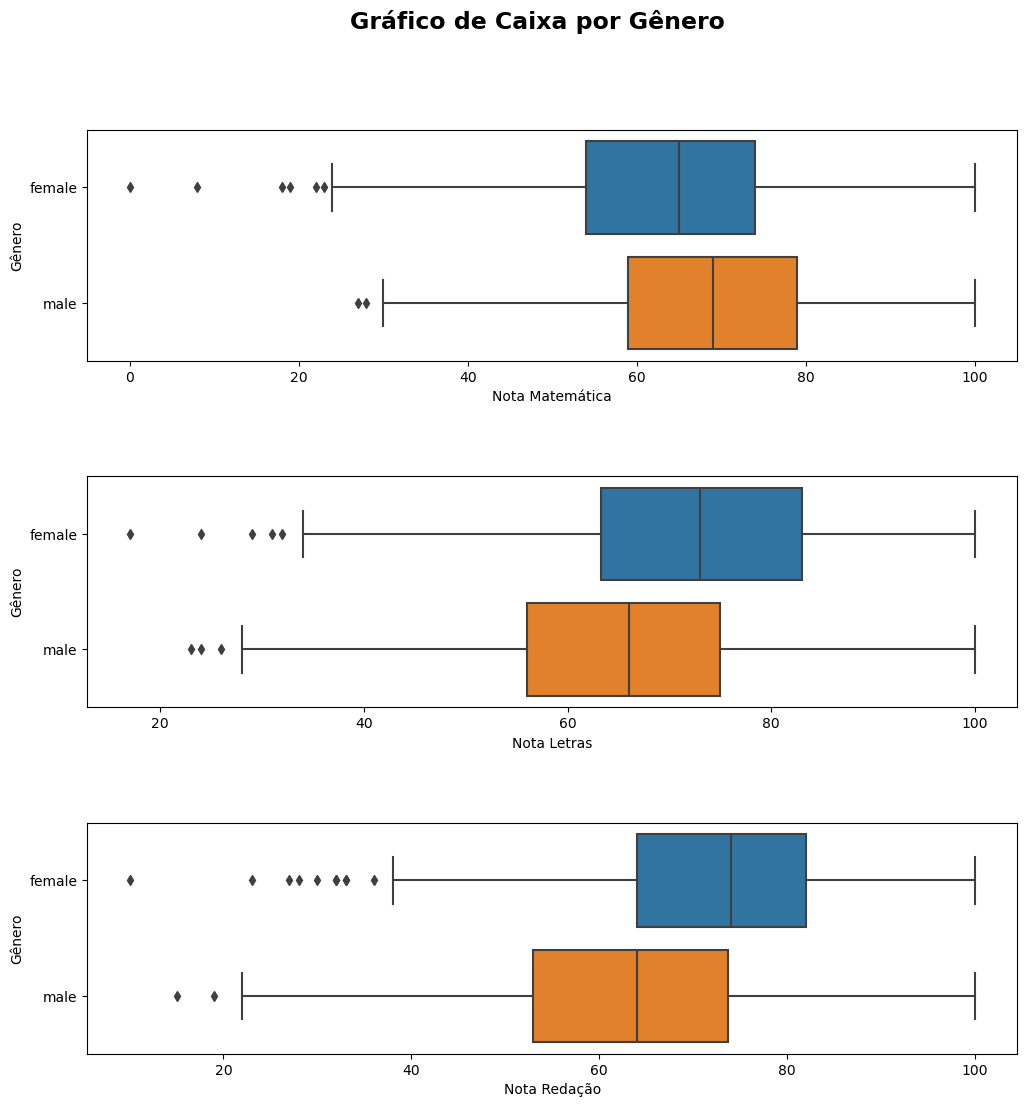

In [15]:
boxplot('Gênero')

----  
## Relatório

In [16]:
def boxplot(ax, coluna, Materia):
    sns.boxplot(ax=ax, data= Base_Dados, x=Materia , y= coluna)

In [17]:
def pizza(ax, coluna): # Adicionando ax como argumento para especificar onde o gráfico será plotado
    pct = round(Base_Dados[coluna].value_counts(normalize=True) * 100, 1)
    pct = pct.values.tolist()

    label = Base_Dados[coluna].unique().tolist()

    explode = [0.05]
    for _ in range(len(label) - 1):
        explode.append(0)

    wedges, _, autotexts = ax.pie(pct, labels=label, autopct='%1.1f%%', explode=explode) # Alterado texts para _

    for w in wedges:
        w.set_linewidth(0.5)
        w.set_edgecolor('black')

    for autotext in autotexts:
        autotext.set_fontsize(10)
        autotext.set_color('white')
        autotext.set_fontweight('semibold')

    colors = ['#ac4bbf', '#28b9de']
    if coluna == 'Gênero':
        for w, color in zip(wedges, colors):
            w.set_color(color)

In [18]:
def mediaNotasPor(ax, colunaEscolhida):
    Parental_Math = Base_Dados.groupby(by= [colunaEscolhida]).mean('Nota Matemática')['Nota Matemática'].reset_index()
    Parental_Read = Base_Dados.groupby(by= [colunaEscolhida]).mean('Nota Letras')['Nota Letras'].reset_index()
    Parental_Writ = Base_Dados.groupby(by= [colunaEscolhida]).mean('Nota Redação')['Nota Redação'].reset_index()

    FigMathParent = Parental_Math['Nota Matemática'].sort_values(ascending= False)
    FigReadParent = Parental_Read['Nota Letras'].sort_values(ascending= False)
    FigWritParent = Parental_Writ['Nota Redação'].sort_values(ascending= False)
    EixoX = Base_Dados[colunaEscolhida].unique()


    ax.plot(EixoX, FigMathParent, color= 'red', marker= 'o', ms= '4', mec= '#000', markerfacecolor= 'w', label= 'Matemática')
    ax.plot(EixoX, FigReadParent, color= 'blue', marker= 'o', ms= '4', mec= '#000', markerfacecolor= 'w', label= 'Letras')
    ax.plot(EixoX, FigWritParent, color= 'green', marker= 'o', ms= '4', mec= '#000', markerfacecolor= 'w', label= 'Redação')

    ax.legend(loc= 'best')


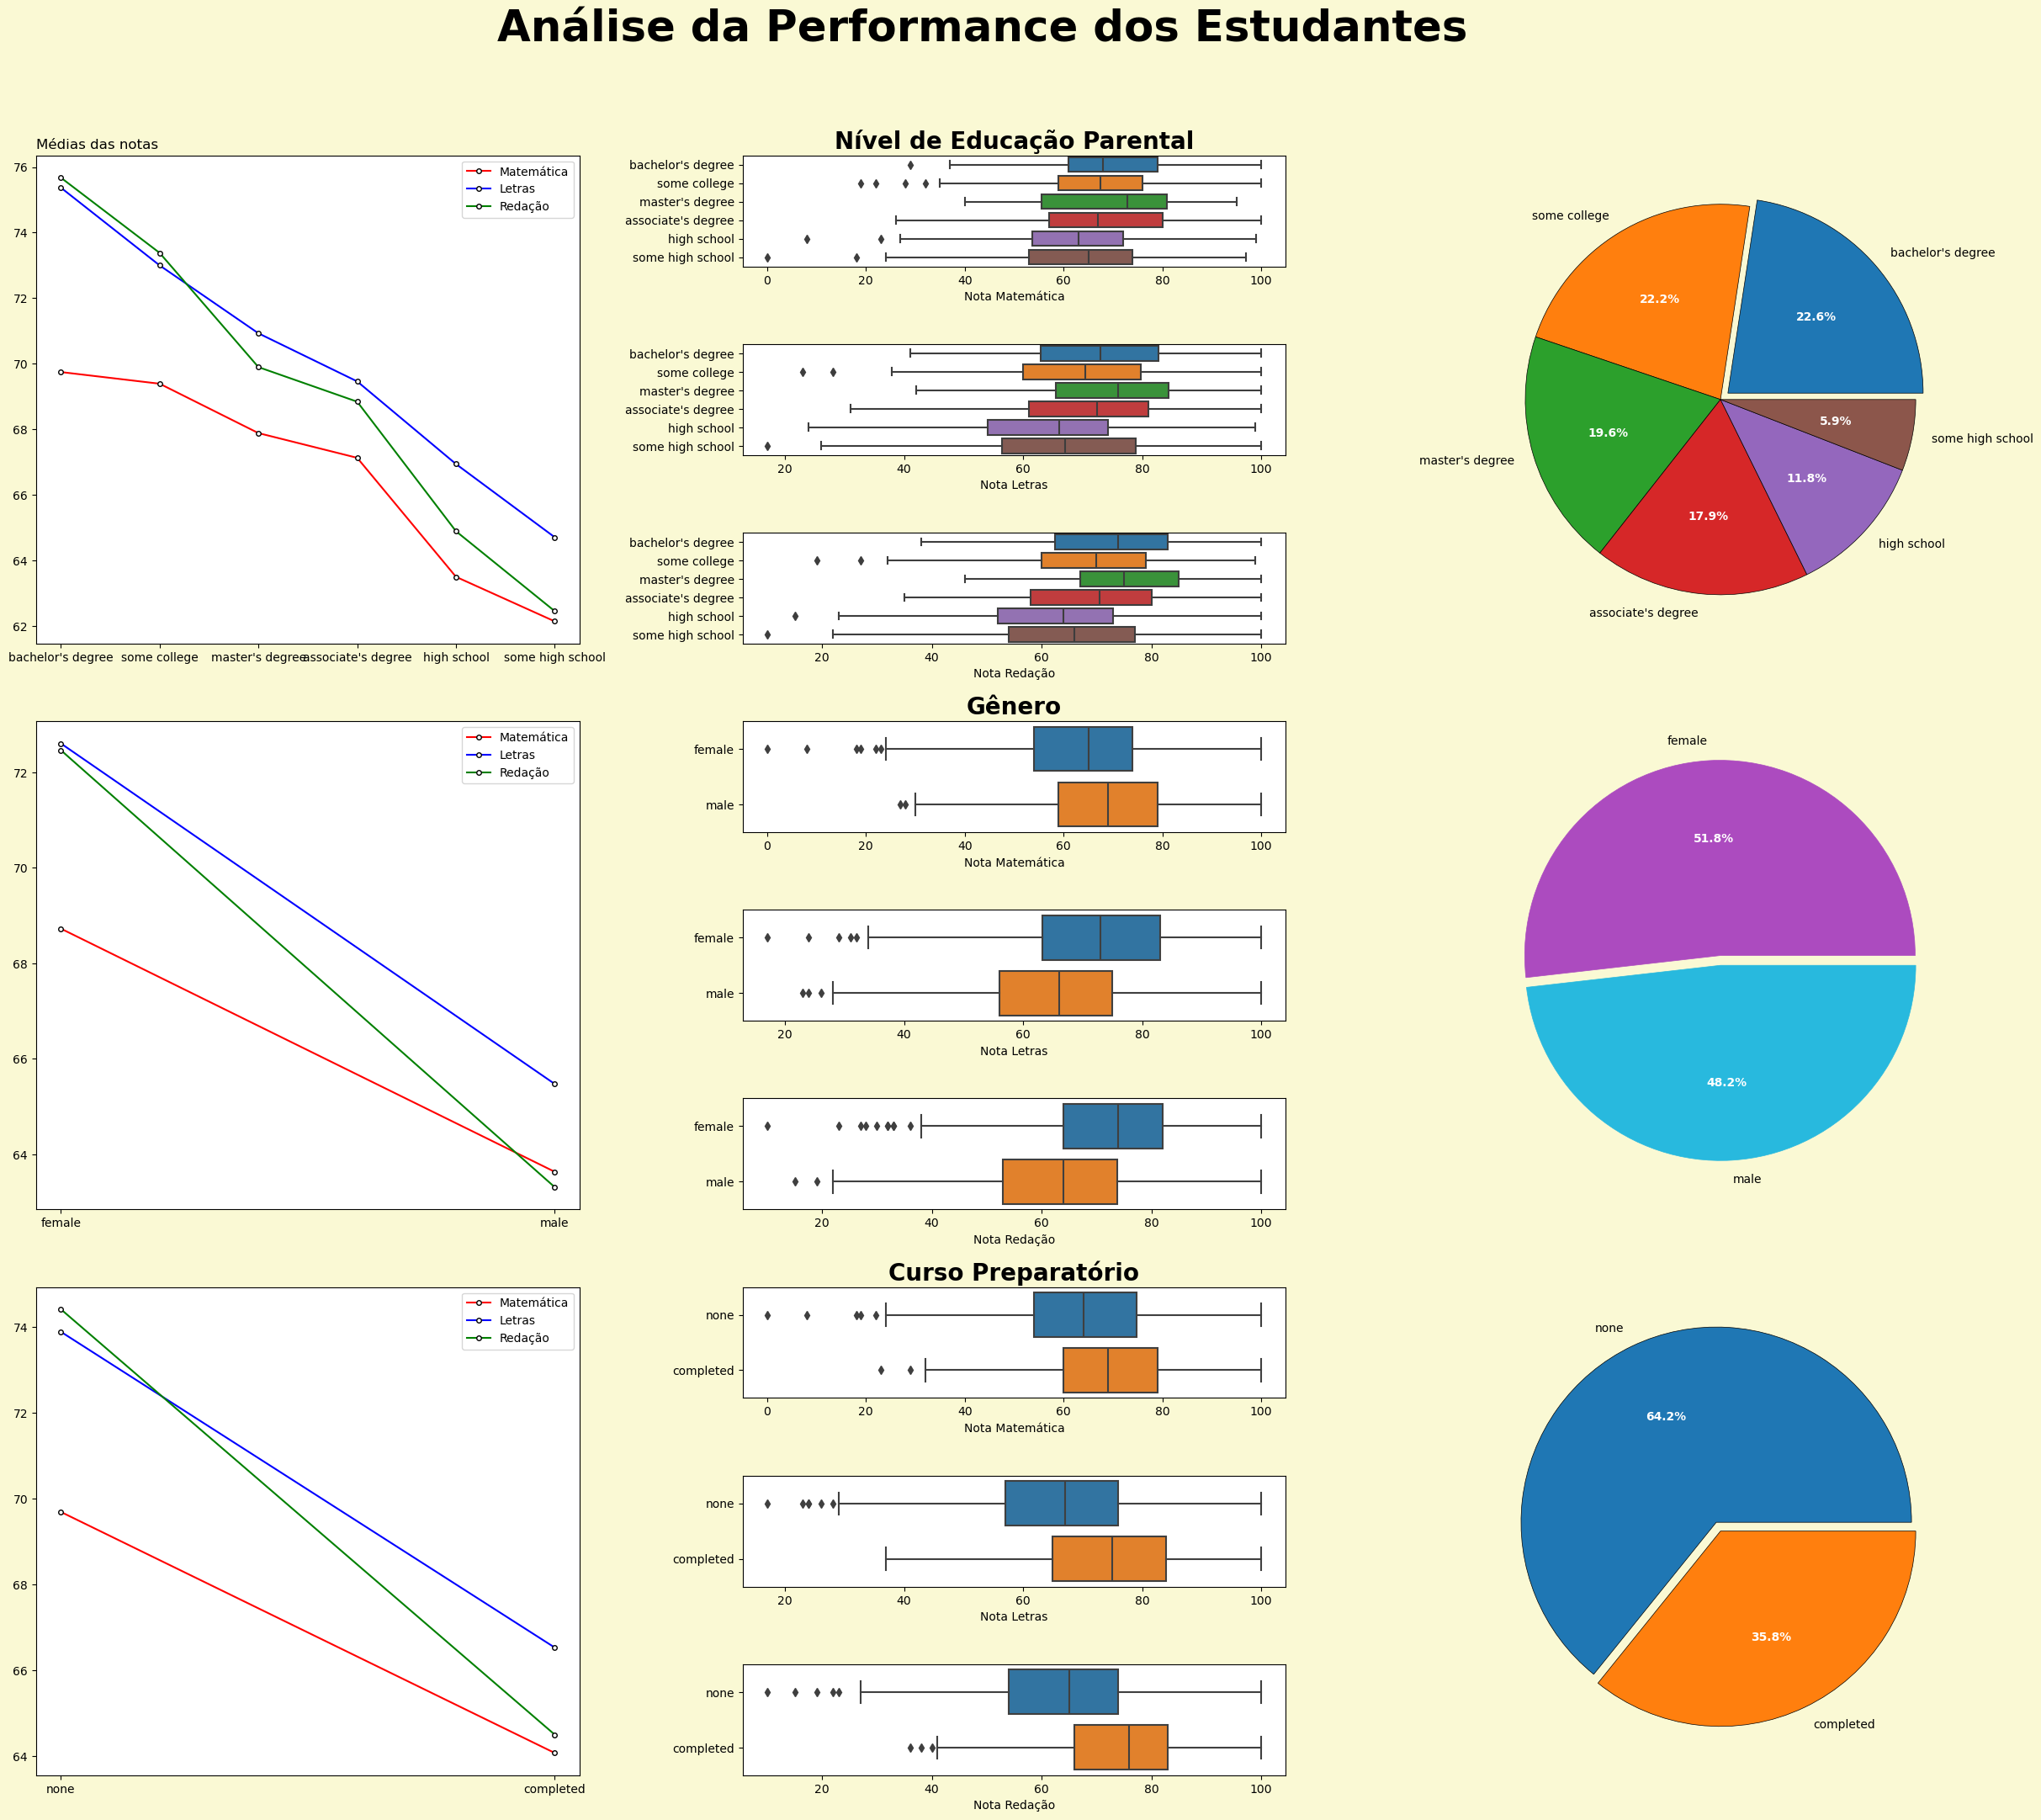

In [19]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

plt.figure(figsize=(30, 25), facecolor= '#faf9d4')
g = gridspec.GridSpec(9, 3)
plt.suptitle('Análise da Performance dos Estudantes', fontsize=37, fontweight='semibold', y= 0.95)

axes1 = plt.subplot(g[:3, 0])

axes2 = plt.subplot(g[0, 1])
axes3 = plt.subplot(g[1, 1])
axes4 = plt.subplot(g[2, 1])

axes5 = plt.subplot(g[:3, 2])

mediaNotasPor(axes1, 'Nivel Educação Parental')

boxplot(axes2, 'Nivel Educação Parental', 'Nota Matemática')
boxplot(axes3, 'Nivel Educação Parental', 'Nota Letras')
boxplot(axes4, 'Nivel Educação Parental', 'Nota Redação')

pizza(axes5, 'Nivel Educação Parental')

axes6= plt.subplot(g[3:6, 0])

axes7= plt.subplot(g[3, 1])
axes8= plt.subplot(g[4, 1])
axes9= plt.subplot(g[5, 1])

axes10= plt.subplot(g[3:6, 2])

#Adicionar gráfico
mediaNotasPor(axes6, 'Gênero')

boxplot(axes7, 'Gênero', 'Nota Matemática')
boxplot(axes8, 'Gênero', 'Nota Letras')
boxplot(axes9, 'Gênero', 'Nota Redação')

pizza(axes10, 'Gênero')

axes11= plt.subplot(g[6:9, 0])

axes12= plt.subplot(g[6, 1])
axes13= plt.subplot(g[7, 1])
axes14= plt.subplot(g[8, 1])

axes15= plt.subplot(g[6:9, 2])

mediaNotasPor(axes11, 'Curso preparatório')

boxplot(axes12, 'Curso preparatório', 'Nota Matemática')
boxplot(axes13, 'Curso preparatório', 'Nota Letras')
boxplot(axes14, 'Curso preparatório', 'Nota Redação')

pizza(axes15, 'Curso preparatório')

axes2.set_ylabel('')
axes3.set_ylabel('')
axes4.set_ylabel('')
axes7.set_ylabel('')
axes8.set_ylabel('')
axes9.set_ylabel('')
axes12.set_ylabel('')
axes13.set_ylabel('')
axes14.set_ylabel('')

axes1.set_title('Médias das notas', loc= 'left')
axes2.set_title('Nível de Educação Parental', fontsize= 20, fontweight= 'semibold')
axes7.set_title('Gênero', fontsize= 20, fontweight= 'semibold')
axes12.set_title('Curso Preparatório', fontsize= 20, fontweight= 'semibold')

plt.subplots_adjust(hspace=0.7, wspace=0.3)
plt.show()
